In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
df = pd.read_csv(r'C:\Users\Marek\Downloads\houses_to_rent.csv')
df.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [3]:
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df.shape

(6080, 13)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(5882, 13)

In [7]:
df.isnull().sum()

city              0
area              0
rooms             0
bathroom          0
parking spaces    0
floor             0
animal            0
furniture         0
hoa               0
rent amount       0
property tax      0
fire insurance    0
total             0
dtype: int64

In [8]:
df.nunique()

city                 2
area               435
rooms                9
bathroom            10
parking spaces      10
floor               37
animal               2
furniture            2
hoa               1292
rent amount       1032
property tax      1036
fire insurance     190
total             4069
dtype: int64

In [9]:
df.describe()

,city,area,rooms,bathroom,parking spaces
count,5882.000000,5882.000000,5882.000000,5882.000000,5882.000000
mean,0.865352,154.494390,2.528052,2.377763,1.799728
std,0.341376,381.295055,1.124299,1.443171,1.615585
min,0.000000,10.000000,1.000000,1.000000,0.000000
25%,1.000000,60.000000,2.000000,1.000000,1.000000
50%,1.000000,100.000000,3.000000,2.000000,1.000000
75%,1.000000,200.000000,3.000000,3.000000,3.000000
max,1.000000,24606.000000,10.000000,10.000000,12.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5882 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            5882 non-null   int64 
 1   area            5882 non-null   int64 
 2   rooms           5882 non-null   int64 
 3   bathroom        5882 non-null   int64 
 4   parking spaces  5882 non-null   int64 
 5   floor           5882 non-null   object
 6   animal          5882 non-null   object
 7   furniture       5882 non-null   object
 8   hoa             5882 non-null   object
 9   rent amount     5882 non-null   object
 10  property tax    5882 non-null   object
 11  fire insurance  5882 non-null   object
 12  total           5882 non-null   object
dtypes: int64(5), object(8)
memory usage: 459.5+ KB


In [11]:
df['floor'].value_counts()

-     1497
1      536
3      384
2      369
4      306
5      302
6      295
8      288
7      284
9      222
10     209
11     191
12     175
13     142
14     140
15     107
16      88
17      72
18      69
19      47
20      35
21      30
22      21
23      18
25      14
24      11
27       7
28       6
26       6
29       4
31       1
32       1
99       1
51       1
35       1
68       1
85       1
Name: floor, dtype: int64

In [12]:
df['floor'] = df['floor'].replace('-',np.nan)
df['floor']= df['floor'].fillna(df['floor'].median()).astype('int')

In [13]:
df['animal'].value_counts()

acept        4535
not acept    1347
Name: animal, dtype: int64

In [14]:
df['furniture'].value_counts()

not furnished    4349
furnished        1533
Name: furniture, dtype: int64

In [15]:
df['animal'] = df['animal'].map({'acept':'Yes','not acept':'No'})

In [16]:
df['furniture'] = df['furniture'].map({'not furnished':'No','furnished':'Yes'})

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
la = LabelEncoder()
df['animal'] = la.fit_transform(df['animal'])
df['furniture'] =la.fit_transform(df['furniture'])

In [19]:
import re
df['total'] = df['total'].map(lambda x: re.sub(r'\D+', '', x))
df['hoa'] = df['hoa'].map(lambda x: re.sub(r'\D+', '', x))
df['rent amount'] = df['rent amount'].map(lambda x: re.sub(r'\D+', '', x))
df['fire insurance'] = df['fire insurance'].map(lambda x: re.sub(r'\D+', '', x))
df['property tax'] = df['property tax'].map(lambda x: re.sub(r'\D+', '', x))

In [20]:
df_new = df.copy()

In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5882 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            5882 non-null   int64 
 1   area            5882 non-null   int64 
 2   rooms           5882 non-null   int64 
 3   bathroom        5882 non-null   int64 
 4   parking spaces  5882 non-null   int64 
 5   floor           5882 non-null   int32 
 6   animal          5882 non-null   int32 
 7   furniture       5882 non-null   int32 
 8   hoa             5882 non-null   object
 9   rent amount     5882 non-null   object
 10  property tax    5882 non-null   object
 11  fire insurance  5882 non-null   object
 12  total           5882 non-null   object
dtypes: int32(3), int64(5), object(5)
memory usage: 459.5+ KB


In [22]:
df_new['hoa'] = pd.to_numeric(df_new['hoa'])
df_new['rent amount'] = pd.to_numeric(df_new['rent amount'])
df_new['property tax'] = pd.to_numeric(df_new['property tax'])
df_new['fire insurance'] = pd.to_numeric(df_new['fire insurance'])
df_new['total'] = pd.to_numeric(df_new['total'])

In [23]:
df_new.describe()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
count,5882.000000,5882.000000,5882.000000,5882.000000,5882.000000,5882.000000,5882.000000,5882.000000,5686.000000,5882.000000,5855.000000,5882.000000,5882.000000
mean,0.865352,154.494390,2.528052,2.377763,1.799728,7.483509,0.770996,0.260626,1144.937390,4479.392724,506.650384,59.316049,6150.218293
std,0.341376,381.295055,1.124299,1.443171,1.615585,5.164871,0.420227,0.439013,4108.649819,3601.273801,6330.234201,49.691101,8868.503973
min,0.000000,10.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,420.000000,0.000000,3.000000,660.000000
25%,1.000000,60.000000,2.000000,1.000000,1.000000,4.000000,1.000000,0.000000,250.000000,1881.000000,35.000000,23.000000,2496.000000
50%,1.000000,100.000000,3.000000,2.000000,1.000000,7.000000,1.000000,0.000000,700.000000,3200.000000,158.000000,42.000000,4247.000000
75%,1.000000,200.000000,3.000000,3.000000,3.000000,9.000000,1.000000,1.000000,1500.000000,6000.000000,473.000000,79.000000,8216.750000
max,1.000000,24606.000000,10.000000,10.000000,12.000000,99.000000,1.000000,1.000000,220000.000000,45000.000000,366300.000000,677.000000,372700.000000


In [24]:
y=df_new['rent amount']
X=df_new.drop(['total','fire insurance','property tax','hoa','rent amount'], axis=1)

In [25]:
lml = LinearRegression()
lml

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
lml.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
lml.coef_

array([ 1.49507017e+03,  4.36341990e-01,  2.68347227e+02,  1.01351742e+03,
        4.90285402e+02,  4.21305838e+01, -5.82942566e+01,  1.17699008e+03])

In [28]:
lml.intercept_

-1429.5551527167454

In [29]:
lml.score(X,y)

0.5067119320147213

In [30]:
y_pred = lml.predict(X)

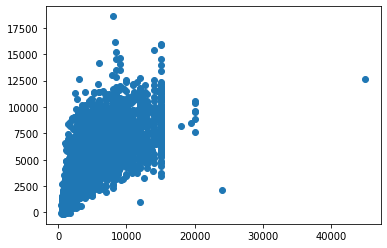

In [31]:
plt.scatter(y, y_pred)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [33]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
city,1511.063570
area,0.421773
rooms,263.223387
bathroom,1025.471223
parking spaces,478.373587
floor,43.247420
animal,-17.755276
furniture,1206.319317


In [35]:
y_pred = regressor.predict(X_test)

In [36]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

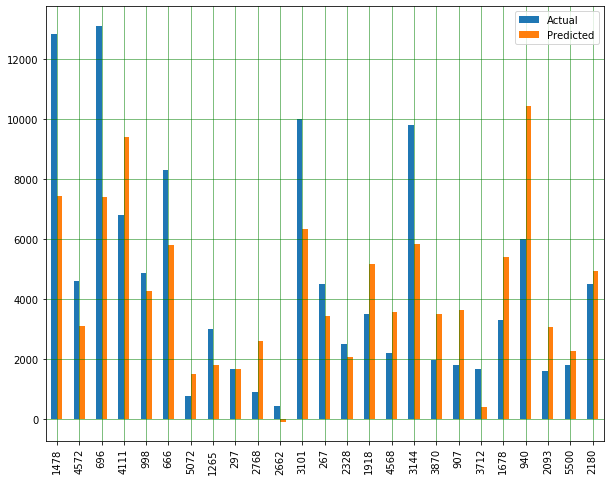

In [37]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [38]:
from sklearn import metrics
%matplotlib inline

In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1762.2801017022182
Mean Squared Error: 6353646.024781062
Root Mean Squared Error: 2520.6439702546377


In [40]:
r_sq = lml.score(X, y)
r_sq


0.5067119320147213

In [41]:
model = sm.OLS(y, X)
model

In [42]:
results = model.fit()

In [43]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            rent amount   R-squared (uncentered):                   0.803
Model:                            OLS   Adj. R-squared (uncentered):              0.802
Method:                 Least Squares   F-statistic:                              2985.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):                        0.00
Time:                        23:13:54   Log-Likelihood:                         -54492.
No. Observations:                5882   AIC:                                  1.090e+05
Df Residuals:                    5874   BIC:                                  1.091e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------